In [13]:
import pandas as pd
import numpy as np
import array
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor
# from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import seaborn as sns

# Using Python Function

In [14]:
df = pd.read_csv(r"profit.csv")

In [15]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [16]:
X = df["population"].values.reshape(-1, 1)
y = df["profit"].values


In [17]:
model = LinearRegression()
model.fit(X, y)


# Evaluate the model
y_pred = model.predict(X)
mse = np.mean(np.square(y_pred-y))
print("Mean Squared Error: {:.2f}".format(mse))

Mean Squared Error: 8.95


# Performing Manually

In [19]:
df.head(10)

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [20]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [22]:
X = df.iloc[:,0]
m = X.shape[0]
print(m)
type(X)

97


pandas.core.series.Series

In [24]:
X = X.values
X = X.reshape(m,1)
X.shape

(97, 1)

In [25]:
y = df.iloc[:,1]
y = (y.values).reshape(m,1)
y.shape

(97, 1)

Text(0.5, 1.0, 'Profit Estimation')

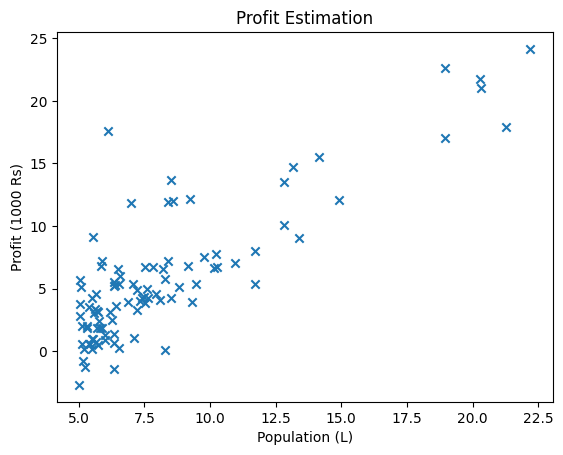

In [26]:
plt.scatter(X,y,marker='x')
plt.xlabel('Population (L)')
plt.ylabel('Profit (1000 Rs)')
plt.title('Profit Estimation')


In [27]:
X.shape
y.shape
c1 = np.ones((m,1))
X = np.hstack((c1,X))

In [28]:
th = np.zeros((2,1))
j = 0
alpha = 0.1
hyp = np.dot(X,th)
print(hyp)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [29]:
# Calculating cost functiion
j = np.sum(np.square(hyp-y))/(2*m)
print(j)

32.072733877455676


In [33]:
th[0] - (alpha/m)*np.sum(hyp-y)
th[1] - (alpha/m)*np.sum((hyp-y)*(X[:,1].reshape(m,1)))


array([6.53288497])

In [36]:
for i in range (100):
    hyp = np.dot(X,th)
    j = np.sum(np.square(hyp-y))/(2*m)
    th[0] = th[0] - (alpha/m)*np.sum(hyp-y)
    th[1] = th[1] - (alpha/m)*np.sum((hyp-y)*(X[:,1].reshape(m,1)))

In [37]:
th

array([[-5.88287103e+84],
       [-5.85588437e+85]])

In [38]:
X_predict = 4.5
y_predict = np.array([1,X_predict])*th

In [39]:
def ComputeCost(X,y,th):
    m = y.shape[0]
    hyp = np.dot(X,th)
    j = np.sum(np.square(hyp-y))/(2*m)
    return [hyp,j]

In [40]:
def GradientDescent(X,y,th,alpha):
    m = y.shape[0]
    hyp = ComputeCost(X,y,th)[0]
    j = ComputeCost(X,y,th)[1]
    th[0] = th[0]-(alpha/m)*np.sum(hyp-y)
    th[1] = th[1]-(alpha/m)*np.sum((hyp-y)*X[:,1].reshape(m,1))
    return [j,th]

In [41]:
def TrainLinearRegression(X,y,alpha,noIter,printIter):
    th = np.zeros((2,1))
    jHistory = []
    for i in range(noIter):
        j = GradientDescent(X,y,th,alpha)[0]
        jHistory.append(j)
        if (i%printIter == 0):
            print('Iteration = ',i)
            print('Cost = ',j)
    
    plot1 = plt.figure(1)
    plt.scatter(X[:,1],y,marker='x')
    plt.plot(X,np.dot(X,th))
    plt.xlabel('Population (L)')
    plt.ylabel('Profit (L)')
    plt.title('Profits')

    plot2 = plt.figure(2)
    plt.plot(list(range(noIter)),jHistory)
    plt.xlabel('# Iteration')
    plt.ylabel('J')
    plt.title('Cost Function Convergence')

    plt.show()
    return th

Iteration =  0
Cost =  32.072733877455676
Iteration =  3500
Cost =  4.884319700846443
Iteration =  7000
Cost =  4.592294485716297
Iteration =  10500
Cost =  4.509620140750548
Iteration =  14000
Cost =  4.486214465619138
Iteration =  17500
Cost =  4.4795881581644625
Iteration =  21000
Cost =  4.477712204993387
Iteration =  24500
Cost =  4.477181109760615
Iteration =  28000
Cost =  4.477030753050958
Iteration =  31500
Cost =  4.476988186033323


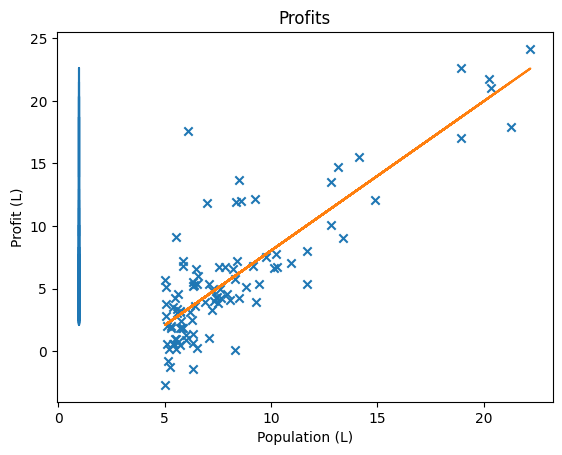

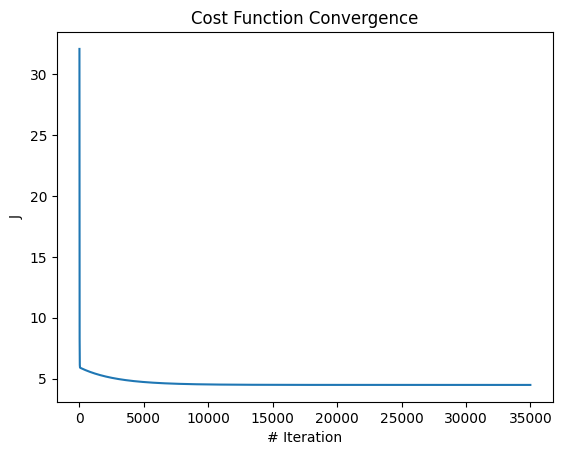

In [48]:
th = TrainLinearRegression(X,y,0.001,35000,3500)

In [49]:
def PredictProfit(population):
    X_pred = np.array([1,population])
    y_pred = np.dot(X_pred,th)
    print('The profit is (in thousand Rs):  ',y_pred)
PredictProfit(7.3)

The profit is (in thousand Rs):   [4.81529253]
